# Dependencies and Setup

In [1]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
# Read from csv 
drug_related_deaths_df = pd.read_csv('../Accidental-Drug-Related-Deaths/Reduced_DataSet (1).csv')
drug_related_deaths_df.head()


,Unnamed: 0,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,1,13-0102,3/21/2013,48,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,...,N,N,N,N,N,N,N,N,N,N
1,2,16-0165,3/13/2016,30,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Y
2,3,16-0208,3/31/2016,23,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Y
3,4,13-0052,2/13/2013,22,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,...,N,N,N,N,N,N,N,N,N,N
4,5,14-0277,6/29/2014,23,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,...,N,N,N,N,N,N,N,N,N,N


In [3]:
# Check for missing data
drug_related_deaths_df.count()

Unnamed: 0            5102
ID                    5102
Date                  5101
Age                   5102
Sex                   5099
Race                  5092
DeathCity             5100
DeathCityGeo          5102
COD                   5102
Heroin                5102
Cocaine               5102
Fentanyl              5102
FentanylAnalogue      5102
Oxycodone             5102
Oxymorphone           5102
Ethanol               5102
Hydrocodone           5102
Benzodiazepine        5102
Methadone             5102
Amphet                5102
Tramad                5102
Morphine_NotHeroin    5102
Hydromorphone         5102
Other                 5102
OpiateNOS             5102
AnyOpioid             5102
dtype: int64

In [4]:
# Drop rows with missing data
reduced_df = drug_related_deaths_df.dropna(how='any')
reduced_df.count()

Unnamed: 0            5087
ID                    5087
Date                  5087
Age                   5087
Sex                   5087
Race                  5087
DeathCity             5087
DeathCityGeo          5087
COD                   5087
Heroin                5087
Cocaine               5087
Fentanyl              5087
FentanylAnalogue      5087
Oxycodone             5087
Oxymorphone           5087
Ethanol               5087
Hydrocodone           5087
Benzodiazepine        5087
Methadone             5087
Amphet                5087
Tramad                5087
Morphine_NotHeroin    5087
Hydromorphone         5087
Other                 5087
OpiateNOS             5087
AnyOpioid             5087
dtype: int64

In [5]:
# Accidental Drug-related deaths by Sex

grouped_gender_df = reduced_df.groupby(["Sex"])
print(grouped_gender_df)
grouped_gender_df.count().head(10)

,Unnamed: 0,ID,Date,Age,Race,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
Sex,,,,,,,,,,,,,,,,,,,,,
Female,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320,...,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
Male,3766,3766,3766,3766,3766,3766,3766,3766,3766,3766,...,3766,3766,3766,3766,3766,3766,3766,3766,3766,3766
Unknown,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


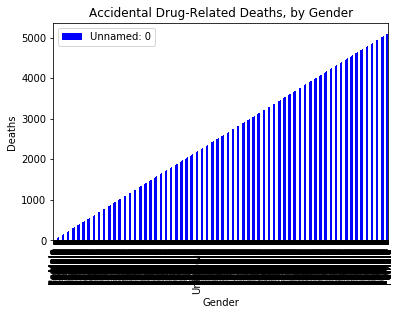

In [7]:
# Graph of Accidental Drug-related Deaths by Sex
reduced_df.plot(kind='bar',x='Sex',y='Unnamed: 0',color='blue')
plt.title("Accidental Drug-Related Deaths, by Gender")
plt.xlabel("Gender")
plt.ylabel("Deaths")
plt.show()

In [8]:
# Accidental Drug-related deaths by Race
grouped_race_df = reduced_df.groupby(["Race"])
print(grouped_race_df)
grouped_race_df.count().head(10)

,Unnamed: 0,ID,Date,Age,Sex,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
Race,,,,,,,,,,,,,,,,,,,,,
Asian Indian,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
"Asian, Other",18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Black,432,432,432,432,432,432,432,432,432,432,...,432,432,432,432,432,432,432,432,432,432
Chinese,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Hawaiian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Hispanic, Black",24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
"Hispanic, White",560,560,560,560,560,560,560,560,560,560,...,560,560,560,560,560,560,560,560,560,560
"Native American, Other",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Other,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


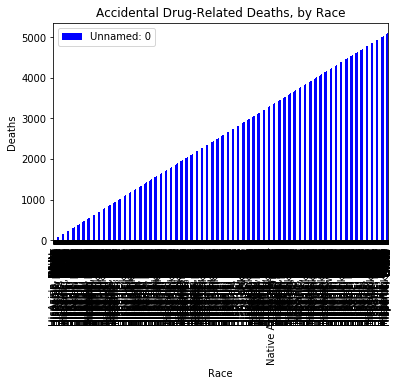

In [9]:
# Bar graph of Accidental Drug-related Deaths by Race
reduced_df.plot(kind='bar',x='Race',y='Unnamed: 0',color='blue')
plt.title("Accidental Drug-Related Deaths, by Race")
plt.xlabel("Race")
plt.ylabel("Deaths")
plt.show()

In [10]:
# Statistical overview
reduced_df.describe()


,Unnamed: 0,Age
count,5087.000000,5087.000000
mean,2553.464124,41.956556
std,1473.050471,12.337623
min,1.000000,14.000000
25%,1278.500000,32.000000
50%,2554.000000,42.000000
75%,3827.500000,52.000000
max,5104.000000,87.000000


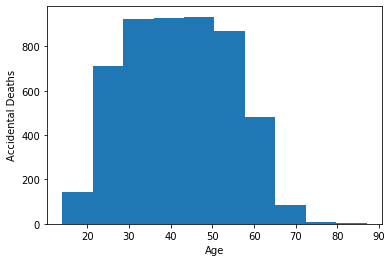

In [11]:
# Histogram of Accidental Deaths by Age
Agedeaths = reduced_df["Age"]

plt.hist(Agedeaths)
plt.xlabel("Age")
plt.ylabel("Accidental Deaths")
plt.show()

In [12]:
# Create age groups (0-under 25, 25-40, 41-65, over 65)
bins = [-1, 25, 41, 66, 199]
AgeGroups = ['Under_25','25-40','41-65','over 65']

#pd.cut(reduced_df["Age"], bins, labels=AgeGroups).head()

#Place data series into new column in dataframe
reduced_df["Age Group"] = pd.cut(reduced_df["Age"], bins, labels=AgeGroups)
reduced_df.head()

C:\Users\loret\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,Age Group
0,1,13-0102,3/21/2013,48,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,...,N,N,N,N,N,N,N,N,N,41-65
1,2,16-0165,3/13/2016,30,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,...,N,N,N,N,N,N,N,N,Y,25-40
2,3,16-0208,3/31/2016,23,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,...,N,N,N,N,N,N,N,N,Y,Under_25
3,4,13-0052,2/13/2013,22,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,...,N,N,N,N,N,N,N,N,N,Under_25
4,5,14-0277,6/29/2014,23,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,...,N,N,N,N,N,N,N,N,N,Under_25


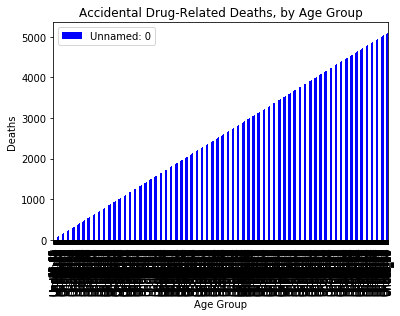

In [14]:
# Accidental Drug-related deaths by Age Groups
reduced_df.plot(kind='bar',x='Age Group',y='Unnamed: 0',color='blue')
plt.title("Accidental Drug-Related Deaths, by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Deaths")
plt.show()